In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy import optimize

In [2]:
img = np.load('./NORMALIZED-RP-STACK.npy')

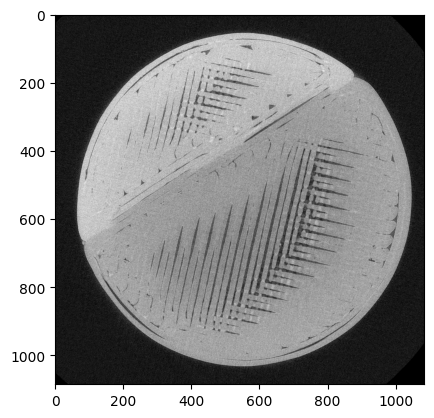

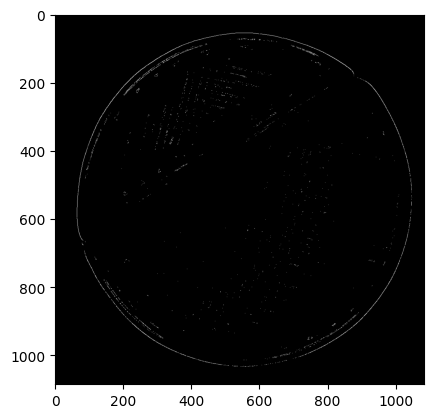

In [25]:
testing = img[:,:,1200]
# ret, mat = cv.threshold(testing, 4, 255, cv.THRESH_BINARY)
mat = cv.Canny(testing, 45, 45)
bitmat = np.packbits(mat)

plt.imshow(img[:,:,1200], cmap='gray')
plt.show()

plt.imshow(mat, cmap='gray')
plt.show()

In [26]:
def cost(params):
    x,y,r = np.int64(params)
    mask = np.zeros([1085, 1085], dtype=np.uint8)
    mask = cv.circle(mask, [x,y], r, [1,1,1])
    return np.sum(mat+mask)

x0,y0,r0 = optimize.fmin(cost, (543, 543, 493))

print(x0)
print(y0)
print(r0)

print(np.int32(r0))

Optimization terminated successfully.
         Current function value: 1224858.000000
         Iterations: 33
         Function evaluations: 113
556.4018428096065
544.9351343476723
489.8094837078832
489


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


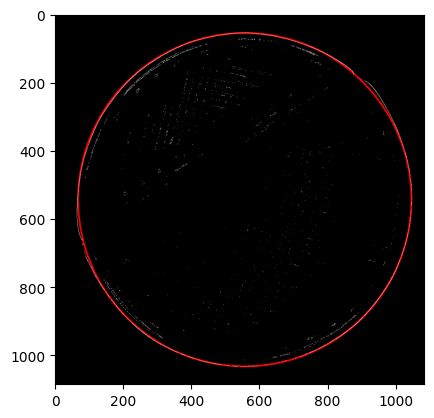

In [27]:
mask = np.zeros([1085,1085,3], dtype=np.uint8)
mask = cv.circle(mask, [np.uint32(x0), np.uint32(y0)], np.uint32(r0), [1,0,0], 3)

plh = np.zeros([1085,1085,3])
plh[:,:,0] = mat
plh[:,:,1] = mat
plh[:,:,2] = mat

plt.imshow(plh+mask)
plt.show()

In [ ]:
radii = []
for i in range(1789):
    testing = img[:,:,i]
    mat = cv.Canny(testing, 45, 45)

    def cost(params):
        x,y,r = np.int64(params)
        if r < 1:
            return 1e13 
        mask = np.zeros([1085, 1085], dtype=np.uint8)
        mask = cv.circle(mask, [x,y], r, [1,1,1])
        return np.sum(mat+mask)
    
    x0,y0,r0 = optimize.fmin(cost, (543, 543, 493))
    radii.append(np.int64(r0))

In [ ]:
plt.plot(range(1789), radii)
plt.show()

dias = 2.*np.asarray(radii)*20.4382 / 1000
plt.plot(range(1789), dias)
plt.ylabel("Object Diameter (mm)")
plt.xlabel("Z-Axis Voxel Depth")
plt.title("Diameter Variation Through Scanned Object")
plt.show()